In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import math

import datetime

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
def mergeSort(arr):
    if len(arr) > 1:

        mid =len(arr)//2

        L = arr[:mid]

        R = arr[mid:]

        mergeSort(L)

        mergeSort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [3]:
  def insertionSort(arr):

    for i in range(1, len(arr)):

        key = arr[i]

        j = i-1
        while j >= 0 and key < arr[j] :
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [4]:
def combineSort(arr1, arr2):
    insertionSort(arr1)
    insertionSort(arr2)
    combined_arr = np.concatenate((arr1, arr2))
    insertionSort(combined_arr)

    return combined_arr

In [5]:
def insertionSortCombination(arr):
    
    len_arr = len(arr)
    n = 10
    # split one time
    if (len_arr %n == 0):
        split_arr = np.split(np.array(arr), n)
    else:
        tmp_val = math.floor(len_arr/n)*n
        split_arr = np.split(np.array(arr)[:tmp_val], n)
        split_arr.append(arr[tmp_val:])
    
    while(len(split_arr) != 1):
        tmp_arr = []
        for i in range(int(len(split_arr)/2)):
            tmp_arr.append(combineSort(split_arr[i*2], split_arr[i*2+1]))
        
        if (len(split_arr)%2 != 0):
            tmp_arr.append(split_arr[-1])
        
        split_arr = tmp_arr
    
    return split_arr

In [6]:
# tamanho dos vetores
n = []
for i in range(10):
    n.append(int(random.uniform(10, 10000)))
print(n)

[4807, 9642, 1207, 931, 4305, 8872, 4566, 4153, 7735, 1721]


In [7]:
# quantidade de entradas
m = int(random.uniform(10, 20))
print(m)

17


In [8]:
# primeiro tamanho n tem que ter m entradas
all_inputs = []
for i in range(len(n)):
    all_inputs.append([])
    for j in range(m):
        all_inputs[i].append([])
        for k in range(n[i]):
            all_inputs[i][j].append(round(random.uniform(-2*n[i], 2*n[i]), 2))

# all inputs[0] -> entradas com tamanho n[0] -> m entradas
# all inputs[1] -> entradas com tamanho n[1] -> m entradas
# all inputs[0][0] -> entradas com tamanho n[0] -> primeira entrada

unsorted_input = deepcopy(all_inputs)
merge_sort_output = deepcopy(all_inputs)
insertion_sort_output = deepcopy(all_inputs)

In [9]:
merge_sort_timer = []
start_all = datetime.datetime.now()
for i in range(len(merge_sort_output)):
    ms_timer = 0
    for j in range(len(merge_sort_output[i])):
        ms_start = datetime.datetime.now()
        mergeSort(merge_sort_output[i][j])
        ms_end = datetime.datetime.now()
        ms_timer += (ms_end - ms_start).total_seconds()
    merge_sort_timer.append(ms_timer/len(merge_sort_output[i]))
end_all = datetime.datetime.now()
runtime_merge = (end_all - start_all).total_seconds()
print(f'{runtime_merge} seconds')

5.167027 seconds


In [10]:
insertion_sort_timer = []
start_all = datetime.datetime.now()
for i in range(len(insertion_sort_output)):
    is_timer = 0
    for j in range(len(insertion_sort_output[i])):
        is_start = datetime.datetime.now()
        insertion_sort_output[i][j] = insertionSortCombination(insertion_sort_output[i][j])
        is_end = datetime.datetime.now()
        is_timer += (is_end - is_start).total_seconds()
    insertion_sort_timer.append(is_timer/len(insertion_sort_output[i]))
end_all = datetime.datetime.now()
runtime_insertion = (end_all - start_all).total_seconds()
print(f'{runtime_insertion} seconds')

748.238629 seconds


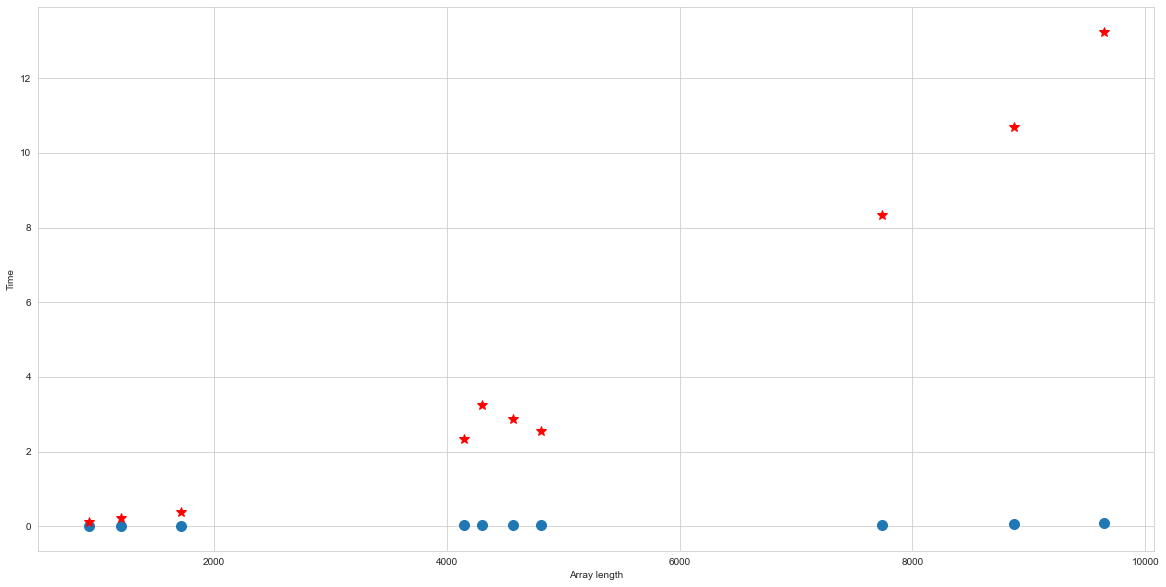

In [11]:
plt.plot(n,merge_sort_timer, marker='o', markersize='10', linestyle='None')
plt.plot(n,insertion_sort_timer, color='red',marker='*', markersize='10', linestyle='None')
plt.ylabel('Time')
plt.xlabel('Array length')
plt.show()